# 환경 세팅

## 라이브러리 세팅

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime, timedelta
import radar
import random
import statsmodels.formula.api as sm
from collections import defaultdict
from tqdm import tqdm
from joypy import joyplot
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
dates_dict = defaultdict(list)
for key, date in zip([1, 1, 3], [2, 3, 4]):
    dates_dict[key].append(date)

In [82]:
dates_dict

defaultdict(list, {1: [2, 3], 3: [4]})

In [2]:
df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
result = sm.ols(formula="A ~ B", data=df).fit()
print(result.params)

Intercept    9.0
B            0.7
dtype: float64


In [3]:
(datetime(2021, 1, 1) + timedelta(days=3)).strftime("%Y-%m-%d")

'2021-01-04'

In [4]:
radar.random_datetime(
    start = datetime(year=2000, month=5, day=24),
    stop = datetime(year=2013, month=5, day=24)
).strftime("%Y-%m-%d")

'2009-05-13'

# 데이터 테스트

## 상장법인목록

In [3]:
krx_list = pd.read_csv("상장법인목록.csv", encoding='cp949')

In [4]:
krx_list.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,미래에셋글로벌리츠,396690,부동산 임대 및 공급업,부동산 임대업,2021-12-03,03월,신현준,NaN,서울특별시
1,대신밸런스제11호스팩,397500,금융 지원 서비스업,금융 지원 서비스업,2021-12-02,12월,정재중,NaN,서울특별시
2,켈스,402420,의료용 기기 제조업,체외진단 의료기기,2021-11-30,12월,이동호,http://www.thecalth.com/,경기도
3,SK스퀘어,402340,기타 금융업,지주회사,2021-11-29,12월,박정호,http://www.sksquare.com,서울특별시
4,마인즈랩,377480,소프트웨어 개발 및 공급업,종합 인공지능 엔진 및 플랫폼,2021-11-23,12월,유태준,maum.ai,대전광역시


In [19]:
krx_list['지역'].value_counts()

서울특별시      1005
경기도         703
충청남도         97
경상남도         90
인천광역시        87
충청북도         86
부산광역시        77
경상북도         66
대구광역시        53
대전광역시        52
전라북도         28
강원도          27
울산광역시        26
전라남도         22
광주광역시        22
세종특별자치시      10
제주특별자치도      10
홍콩            8
미국            6
케이맨 제도        5
일본            3
싱가포르          1
Name: 지역, dtype: int64

In [74]:
kospi_list = pd.read_csv("코스피30.csv", encoding='cp949')

FileNotFoundError: [Errno 2] No such file or directory: '코스피30.csv'

In [6]:
kospi_list['종목코드'] = kospi_list['종목코드'].map('{:06d}'.format)

In [7]:
kospi_list.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액
0,005930,삼성전자,75600,-200,-0.26,451315561.0
1,000660,SK하이닉스,118000,-2000,-1.67,85904279.0
2,035420,NAVER,402000,3500,0.88,66033885.0
3,207940,삼성바이오로직스,900000,8000,0.90,59548500.0
4,035720,카카오,123500,1000,0.82,55043733.0


## pandas_datareader 테스트

In [38]:
dayInterval = 30
baseDate = datetime.strptime("2021-09-10", "%Y-%m-%d")
startDate = (baseDate + timedelta(days = -dayInterval)).strftime("%Y-%m-%d")
endDate = (baseDate + timedelta(days = +dayInterval)).strftime("%Y-%m-%d")

In [39]:
stock_test2 = pdr.get_data_yahoo('000660.ks', f'2020-02-01', f'2020-11-30')

In [40]:
stock_test = pdr.get_data_yahoo('000660.ks', f'{startDate}', f'{endDate}')

In [41]:
random.sample(stock_test2.index.tolist(),3)

[Timestamp('2020-06-17 00:00:00'),
 Timestamp('2020-03-19 00:00:00'),
 Timestamp('2020-10-19 00:00:00')]

In [42]:
stock_test2.index.tolist()[0].strftime("%Y-%m-%d")

'2020-02-03'

In [43]:
stock_test = pdr.get_data_yahoo('000660.ks', f'{startDate}', f'{endDate}')

In [44]:
stock_test.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

# 분석함수 만들기

* 구성요소
    1. 날짜 추출 함수
    2. 이전과 이후 한달 간의 주가 확인
    3. 추출 당일의 주가가 이전 한달에 비해 어느 정도 수준인지 확인
    4. 백분율로 환산
    5. 위치가 어느정도 되는지 판단
    6. 기간 _ 증가/감소 확인
    7. aaa

## 작동테스트

In [17]:
mdate = "2010-10-05"
rdate = "1899-12-31"
mdate1 = datetime.strptime(mdate, "%Y-%m-%d").date()
rdate1 = datetime.strptime(rdate, "%Y-%m-%d").date()
delta =  (mdate1 - rdate1).days
print(delta)

40455


In [18]:
#이전기간에서 상대적인 위치

In [45]:
stock_test_before = stock_test.loc[(stock_test.index <= baseDate.strftime("%Y-%m-%d")),].copy()

In [46]:
stock_test_before['rank_pct'] = pd.qcut(stock_test_before['Close'], q=10, labels= range(10, 0, -1))#.rank(pct=True, ascending=False)*100/10
#stock_test_before['rank_pct'] = stock_test_before['rank_pct'].round(0)

In [48]:
stock_test_before['timeIndex'] = stock_test_before.index
stock_test_before['timeIndex'].rank(ascending=True)

Date
2021-08-11     1.0
2021-08-12     2.0
2021-08-13     3.0
2021-08-17     4.0
2021-08-18     5.0
2021-08-19     6.0
2021-08-20     7.0
2021-08-23     8.0
2021-08-24     9.0
2021-08-25    10.0
2021-08-26    11.0
2021-08-27    12.0
2021-08-30    13.0
2021-08-31    14.0
2021-09-01    15.0
2021-09-02    16.0
2021-09-03    17.0
2021-09-06    18.0
2021-09-07    19.0
2021-09-08    20.0
2021-09-09    21.0
2021-09-10    22.0
Name: timeIndex, dtype: float64

In [31]:
max(stock_test_before.index.tolist())

Timestamp('2021-09-10 00:00:00')

In [32]:
min_date = min(stock_test_before.index.tolist()).date()
stock_test_before['dateInt'] = stock_test_before.index.map(lambda x : (x.date() - min_date).days + 1)

In [33]:
stock_test_before

,High,Low,Open,Close,Volume,Adj Close,rank_pct,dateInt
Date,,,,,,,,
2021-08-11,110000,105000,109000,105500,13715267,105500,3,1
2021-08-12,104000,99800,102000,100500,19150647,100500,10,2
2021-08-13,101500,98900,99600,101500,11622957,101500,10,3
2021-08-17,103500,100500,101000,101500,7851717,101500,10,7
2021-08-18,105500,101500,103000,104000,8047599,104000,6,8
2021-08-19,105500,101500,103000,102500,6161038,102500,9,9
2021-08-20,104500,102000,104000,102500,4719139,102500,9,10
2021-08-23,105000,103000,104500,103000,4515699,103000,8,13
2021-08-24,105500,104000,104500,105000,4454743,105000,4,14


In [36]:
stock_test_before[stock_test_before.index == "2021-09-10"]["rank_pct"][0]

4

In [50]:
def randomStocks(cntStocks: int):
    
    """
    랜덤하게 종목 선정
    """
    
    return random.sample(kospi_list['종목코드'].tolist(), cntStocks)

In [51]:
randomStocks_test = randomStocks(3)

In [52]:
def getDateList(startDate : str, endDate : str, code: str, cntDays: int):
    
    """
    yahoo 패키지의 경우 빈 값이 많음 이에 따라 값이 있는 데이터들에서 
    랜덤하게 날짜를 추출해 보기로 함
    """
    
    stockDf = pdr.get_data_yahoo(f'{code}.ks', f'{startDate}', f'{endDate}')
    
    
    return random.sample(stockDf.index.tolist(), cntDays)

In [53]:
getDateList_test = getDateList("2019-02-01", "2019-11-30", randomStocks_test[0], 5)

In [54]:
getDateList_test

[Timestamp('2019-03-07 00:00:00'),
 Timestamp('2019-02-13 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-03-11 00:00:00'),
 Timestamp('2019-02-22 00:00:00')]

In [55]:
def getStockDf(code: str, dateList: list, dayInterval : int):
    
    min_datetime_minusN = (min(dateList) + timedelta(days = -dayInterval)).strftime("%Y-%m-%d")
    max_datetime_plusN = (max(dateList) + timedelta(days = +dayInterval)).strftime("%Y-%m-%d")
    
    return pdr.get_data_yahoo(f'{code}.ks', f'{min_datetime_minusN}', f'{max_datetime_plusN}')

In [56]:
getStockDf_test = getStockDf(randomStocks_test[0], getDateList_test, 30)

In [57]:
getStockDf_test.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-14,6790,6360,6550,6720,360862,6156.871094
2019-01-15,6880,6690,6820,6750,270407,6184.356934
2019-01-16,7090,6720,6810,7090,735992,6495.865723
2019-01-17,7600,6750,7160,7250,2294225,6642.458008
2019-01-18,9380,7250,7270,8950,6420175,8200.000000


In [70]:
def getStockValue2(baseDate: datetime, stockDf: pd.DataFrame):
    
    """
    1. 기준일자의 종가를 구합니다.
    2. 기준일자 이전 한달 동안 종가중 기준일자의 종가가 상위%인지 체크합니다.
    3. 기준일자 이후 한달 간의 종가가 기준일자의 종가보다 높은지 낮은지 체크합니다.
    4. 기준일자 이후 한달 간의 종가 기울기를 구해봅니다.
    
    """
    
    baseDate_str = baseDate.strftime("%Y-%m-%d")
    
    stockDf = stockDf
    
    #1. baseDate의 값 위치
    stockDf_before = stockDf.loc[(stockDf.index <= baseDate_str),].copy()
    stockDf_before['rank_pct'] = pd.qcut(stockDf_before['Close'], q=10, labels= range(10, 0, -1))
    
    #1. Output
    stockDf_baseDate_rank = stockDf_before[stockDf_before.index == f"{baseDate_str}"]["rank_pct"][0]
    stockDf_baseDate_Close = stockDf_before[stockDf_before.index == f"{baseDate_str}"]["Close"][0]
    
    
    #2. baseDate 이후의 종가가 baseDate의 종가보다 높거나 낮은 일수
    stockDf_after = stockDf.loc[(stockDf.index > baseDate_str),].copy()
    stockDf_after['basePrice'] = stockDf_baseDate_Close
    stockDf_after['priceGroup'] = stockDf_after['Close'].map(lambda x : 1 if x > stockDf_baseDate_Close else 0)
    
    upperCnt = sum(stockDf_after['priceGroup'].tolist())
    totalCnt = len(stockDf_after['priceGroup'].tolist())
    
    #2. Output
    probUpperCnt = int((upperCnt/totalCnt)*100)
    
    #3. baseDate 이후의 주가 기울기
    min_date = min(stockDf_after.index.tolist()).date()
    stockDf_after['timeIndex'] = stockDf_after.index
    stockDf_after['timeIndex'].rank(ascending=True)    
    regResult = sm.ols(formula = "Close ~ timeIndex", data = stockDf_after).fit()
    
    #3, Ouput
    regSlope = regResult.params[1]
    
    return stockDf_before

In [72]:
getStockValue_test2 = getStockValue2(getDateList_test[0], getStockDf_test)
getStockValue_test2

,High,Low,Open,Close,Volume,Adj Close,rank_pct
Date,,,,,,,
2019-01-14,6790,6360,6550,6720,360862,6156.871094,9
2019-01-15,6880,6690,6820,6750,270407,6184.356934,9
2019-01-16,7090,6720,6810,7090,735992,6495.865723,5
2019-01-17,7600,6750,7160,7250,2294225,6642.458008,4
2019-01-18,9380,7250,7270,8950,6420175,8200.000000,1
2019-01-21,9450,8640,8900,9210,2526332,8438.212891,1
2019-01-22,9090,8370,9080,8410,935213,7705.250977,1
2019-01-23,8470,8080,8290,8290,567869,7595.307129,1
2019-01-24,8510,8160,8350,8180,364900,7494.524902,2


In [71]:
def getStockValue(baseDate: datetime, stockDf: pd.DataFrame):
    
    """
    1. 기준일자의 종가를 구합니다.
    2. 기준일자 이전 한달 동안 종가중 기준일자의 종가가 상위%인지 체크합니다.
    3. 기준일자 이후 한달 간의 종가가 기준일자의 종가보다 높은지 낮은지 체크합니다.
    4. 기준일자 이후 한달 간의 종가 기울기를 구해봅니다.
    
    """
    
    baseDate_str = baseDate.strftime("%Y-%m-%d")
    
    stockDf = stockDf
    
    #1. baseDate의 값 위치
    stockDf_before = stockDf.loc[(stockDf.index <= baseDate_str),].copy()
    stockDf_before['rank_pct'] = pd.qcut(stockDf_before['Close'], q=10, labels= range(10, 0, -1))
    
    #1. Output
    stockDf_baseDate_rank = stockDf_before[stockDf_before.index == f"{baseDate_str}"]["rank_pct"][0]
    stockDf_baseDate_Close = stockDf_before[stockDf_before.index == f"{baseDate_str}"]["Close"][0]
    
    
    #2. baseDate 이후의 종가가 baseDate의 종가보다 높거나 낮은 일수
    stockDf_after = stockDf.loc[(stockDf.index > baseDate_str),].copy()
    stockDf_after['basePrice'] = stockDf_baseDate_Close
    stockDf_after['priceGroup'] = stockDf_after['Close'].map(lambda x : 1 if x > stockDf_baseDate_Close else 0)
    
    upperCnt = sum(stockDf_after['priceGroup'].tolist())
    totalCnt = len(stockDf_after['priceGroup'].tolist())
    
    #2. Output
    probUpperCnt = int((upperCnt/totalCnt)*100)
    
    #3. baseDate 이후의 주가 기울기
    min_date = min(stockDf_after.index.tolist()).date()
    stockDf_after['timeIndex'] = stockDf_after.index
    stockDf_after['timeIndex'].rank(ascending=True)    
    regResult = sm.ols(formula = "Close ~ timeIndex", data = stockDf_after).fit()
    
    #3, Ouput
    regSlope = regResult.params[1]
    
    return stockDf_baseDate_rank, probUpperCnt, regSlope

In [59]:
getStockValue_test = getStockValue(getDateList_test[0], getStockDf_test)
getStockValue_test

(10, 0, -469.99999999997)

In [62]:
def getStockValList(cntStocks: int, startDate : str, endDate : str, cntDays: int, dayInterval: int ):
    val_list = []
    stock_list = randomStocks(cntStocks = cntStocks)

    for stock_val in stock_list: 
        try :
            date_list = getDateList(startDate = startDate, endDate = endDate
                                    , code = stock_val, cntDays = cntDays)
            stock_df = getStockDf(code = stock_val, dateList = date_list, dayInterval = dayInterval)
            
        except Exception:
            print("*"*50, "stock_error", "*"*50)
            print(f"Error {kospi_list.loc[(kospi_list['종목코드'] == stock_val), '종목명']}")
            pass
            
        for date_val in date_list:
            try :
                resultVal_list = getStockValue(baseDate = date_val, stockDf = stock_df)
                val_list.append(resultVal_list)
            except Exception:
                print("*"*50, "date_error", "*"*50)
                print(f"Error {kospi_list.loc[(kospi_list['종목코드'] == stock_val), '종목명']} {date_val}")
                pass
            
    return val_list, stock_list

In [63]:
val_list = getStockValList(90, '2019-02-01', '2019-11-30', 90, 30)[0]
stock_list = getStockValList(90, '2019-02-01', '2019-11-30', 90, 30)[1]

************************************************** date_error **************************************************
Error 219    영진약품
Name: 종목명, dtype: object 2019-02-08 00:00:00
************************************************** date_error **************************************************
Error 265    쿠쿠홀딩스
Name: 종목명, dtype: object 2019-02-15 00:00:00
************************************************** date_error **************************************************
Error 265    쿠쿠홀딩스
Name: 종목명, dtype: object 2019-02-18 00:00:00
************************************************** date_error **************************************************
Error 265    쿠쿠홀딩스
Name: 종목명, dtype: object 2019-02-11 00:00:00
************************************************** date_error **************************************************
Error 4    카카오
Name: 종목명, dtype: object 2019-05-20 00:00:00
************************************************** date_error **************************************************
Error 4

************************************************** date_error **************************************************
Error 348    환인제약
Name: 종목명, dtype: object 2019-02-14 00:00:00
************************************************** date_error **************************************************
Error 348    환인제약
Name: 종목명, dtype: object 2019-02-12 00:00:00
************************************************** stock_error **************************************************
Error 435    이지스레지던스리츠
Name: 종목명, dtype: object
************************************************** date_error **************************************************
Error 435    이지스레지던스리츠
Name: 종목명, dtype: object 2019-02-14 00:00:00
************************************************** date_error **************************************************
Error 435    이지스레지던스리츠
Name: 종목명, dtype: object 2019-02-12 00:00:00
************************************************** date_error **************************************************
Error 423  

************************************************** stock_error **************************************************
Error 212    SK리츠
Name: 종목명, dtype: object
************************************************** date_error **************************************************
Error 212    SK리츠
Name: 종목명, dtype: object 2019-09-17 00:00:00
************************************************** date_error **************************************************
Error 212    SK리츠
Name: 종목명, dtype: object 2019-04-01 00:00:00
************************************************** date_error **************************************************
Error 212    SK리츠
Name: 종목명, dtype: object 2019-04-15 00:00:00
************************************************** date_error **************************************************
Error 212    SK리츠
Name: 종목명, dtype: object 2019-03-19 00:00:00
************************************************** date_error **************************************************
Error 212    SK리츠
Name: 종목

************************************************** date_error **************************************************
Error 451    한국주철관
Name: 종목명, dtype: object 2019-02-28 00:00:00
************************************************** date_error **************************************************
Error 451    한국주철관
Name: 종목명, dtype: object 2019-03-04 00:00:00
************************************************** date_error **************************************************
Error 451    한국주철관
Name: 종목명, dtype: object 2019-02-07 00:00:00
************************************************** stock_error **************************************************
Error 43    SK스퀘어
Name: 종목명, dtype: object
************************************************** date_error **************************************************
Error 6    삼성SDI
Name: 종목명, dtype: object 2019-02-14 00:00:00
************************************************** date_error **************************************************
Error 198    다우기술
Name: 

************************************************** date_error **************************************************
Error 414    신흥
Name: 종목명, dtype: object 2019-05-13 00:00:00
************************************************** date_error **************************************************
Error 414    신흥
Name: 종목명, dtype: object 2019-09-27 00:00:00
************************************************** date_error **************************************************
Error 414    신흥
Name: 종목명, dtype: object 2019-11-04 00:00:00
************************************************** date_error **************************************************
Error 414    신흥
Name: 종목명, dtype: object 2019-11-06 00:00:00
************************************************** date_error **************************************************
Error 414    신흥
Name: 종목명, dtype: object 2019-09-18 00:00:00
************************************************** date_error **************************************************
Error 414    신흥
N

************************************************** date_error **************************************************
Error 574    금강공업
Name: 종목명, dtype: object 2019-02-07 00:00:00
************************************************** date_error **************************************************
Error 574    금강공업
Name: 종목명, dtype: object 2019-02-08 00:00:00
************************************************** date_error **************************************************
Error 574    금강공업
Name: 종목명, dtype: object 2019-11-14 00:00:00
************************************************** date_error **************************************************
Error 506    한솔로지스틱스
Name: 종목명, dtype: object 2019-02-08 00:00:00
************************************************** date_error **************************************************
Error 506    한솔로지스틱스
Name: 종목명, dtype: object 2019-02-14 00:00:00
************************************************** date_error **************************************************
E

************************************************** date_error **************************************************
Error 716    한익스프레스
Name: 종목명, dtype: object 2019-02-08 00:00:00
************************************************** date_error **************************************************
Error 580    예스코홀딩스
Name: 종목명, dtype: object 2019-03-07 00:00:00
************************************************** date_error **************************************************
Error 580    예스코홀딩스
Name: 종목명, dtype: object 2019-02-22 00:00:00
************************************************** date_error **************************************************
Error 580    예스코홀딩스
Name: 종목명, dtype: object 2019-02-25 00:00:00
************************************************** date_error **************************************************
Error 591    조일알미늄
Name: 종목명, dtype: object 2019-02-21 00:00:00
************************************************** date_error *************************************************

************************************************** date_error **************************************************
Error 565    아센디오
Name: 종목명, dtype: object 2019-11-08 00:00:00
************************************************** date_error **************************************************
Error 565    아센디오
Name: 종목명, dtype: object 2019-10-23 00:00:00
************************************************** date_error **************************************************
Error 565    아센디오
Name: 종목명, dtype: object 2019-11-05 00:00:00
************************************************** date_error **************************************************
Error 398    동양
Name: 종목명, dtype: object 2019-03-19 00:00:00
************************************************** date_error **************************************************
Error 398    동양
Name: 종목명, dtype: object 2019-02-08 00:00:00
************************************************** date_error **************************************************
Error 302  

************************************************** date_error **************************************************
Error 466    KISCO홀딩스
Name: 종목명, dtype: object 2019-04-29 00:00:00
************************************************** stock_error **************************************************
Error 436    NH올원리츠
Name: 종목명, dtype: object
************************************************** date_error **************************************************
Error 436    NH올원리츠
Name: 종목명, dtype: object 2019-05-29 00:00:00
************************************************** date_error **************************************************
Error 436    NH올원리츠
Name: 종목명, dtype: object 2019-04-30 00:00:00
************************************************** date_error **************************************************
Error 436    NH올원리츠
Name: 종목명, dtype: object 2019-04-25 00:00:00
************************************************** date_error **************************************************
Error 436    N

************************************************** date_error **************************************************
Error 813    폴루스바이오팜
Name: 종목명, dtype: object 2019-10-11 00:00:00
************************************************** date_error **************************************************
Error 813    폴루스바이오팜
Name: 종목명, dtype: object 2019-11-25 00:00:00
************************************************** date_error **************************************************
Error 813    폴루스바이오팜
Name: 종목명, dtype: object 2019-10-15 00:00:00
************************************************** date_error **************************************************
Error 813    폴루스바이오팜
Name: 종목명, dtype: object 2019-11-15 00:00:00
************************************************** date_error **************************************************
Error 813    폴루스바이오팜
Name: 종목명, dtype: object 2019-10-18 00:00:00
************************************************** date_error *******************************************

************************************************** date_error **************************************************
Error 332    스카이라이프
Name: 종목명, dtype: object 2019-02-26 00:00:00
************************************************** date_error **************************************************
Error 332    스카이라이프
Name: 종목명, dtype: object 2019-02-07 00:00:00
************************************************** date_error **************************************************
Error 332    스카이라이프
Name: 종목명, dtype: object 2019-03-12 00:00:00
************************************************** date_error **************************************************
Error 332    스카이라이프
Name: 종목명, dtype: object 2019-02-20 00:00:00
************************************************** date_error **************************************************
Error 332    스카이라이프
Name: 종목명, dtype: object 2019-03-14 00:00:00
************************************************** date_error ************************************************

************************************************** date_error **************************************************
Error 452    대한방직
Name: 종목명, dtype: object 2019-04-12 00:00:00
************************************************** date_error **************************************************
Error 452    대한방직
Name: 종목명, dtype: object 2019-06-20 00:00:00
************************************************** date_error **************************************************
Error 452    대한방직
Name: 종목명, dtype: object 2019-06-04 00:00:00
************************************************** date_error **************************************************
Error 452    대한방직
Name: 종목명, dtype: object 2019-03-26 00:00:00
************************************************** date_error **************************************************
Error 452    대한방직
Name: 종목명, dtype: object 2019-04-29 00:00:00
************************************************** date_error **************************************************
Error 4

In [64]:
stock_list

['008250',
 '009970',
 '119650',
 '024090',
 '014830',
 '014130',
 '009830',
 '002020',
 '015360',
 '018470',
 '009440',
 '096770',
 '330590',
 '000300',
 '004250',
 '003070',
 '012170',
 '001520',
 '293480',
 '357250',
 '307950',
 '015230',
 '011780',
 '042670',
 '007980',
 '003300',
 '008600',
 '204320',
 '015760',
 '234080',
 '034220',
 '005420',
 '005430',
 '000480',
 '028050',
 '004360',
 '006360',
 '001940',
 '400760',
 '111770',
 '003280',
 '068270',
 '007630',
 '033240',
 '248070',
 '005070',
 '006490',
 '001430',
 '294870',
 '001130',
 '012690',
 '024900',
 '012160',
 '015540',
 '010040',
 '006740',
 '067830',
 '000240',
 '033780',
 '302440',
 '268280',
 '036570',
 '019180',
 '134380',
 '023810',
 '002780',
 '000180',
 '053210',
 '267290',
 '064960',
 '017800',
 '004910',
 '000100',
 '042660',
 '009540',
 '051900',
 '001120',
 '010060',
 '102280',
 '032560',
 '044820',
 '011790',
 '003220',
 '081660',
 '044380',
 '011930',
 '019440',
 '006340',
 '032830',
 '001070']

In [65]:
df_test = pd.DataFrame(val_list, columns = ['percentile_group', 'upper_prob', 'slope'])

In [22]:
df_test

,percentile_group,upper_prob,slope
0,10,0,-3.892316
1,4,9,-12.902396
2,6,9,-13.215049
3,3,1,-11.219820
4,10,21,-13.453577
...,...,...,...
7953,1,42,90.792461
7954,5,76,51.200521
7955,1,37,250.823524
7956,1,44,84.969138


In [66]:
df_test['percentile_group'].value_counts()

10    1782
1     1091
9     1066
8      756
2      598
7      574
6      495
3      461
4      452
5      438
Name: percentile_group, dtype: int64

<AxesSubplot:xlabel='percentile_group', ylabel='upper_prob'>

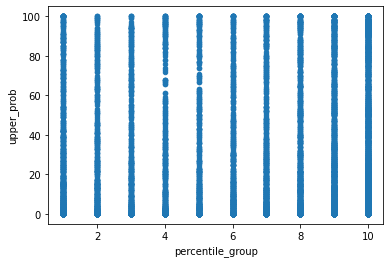

In [24]:
df_test.plot.scatter(x = 'percentile_group', y = 'upper_prob')

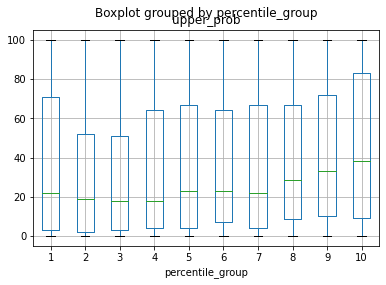

In [67]:
boxplot = df_test.boxplot(column=['upper_prob'], by="percentile_group")

In [256]:
round(0.3, 0)

0.0

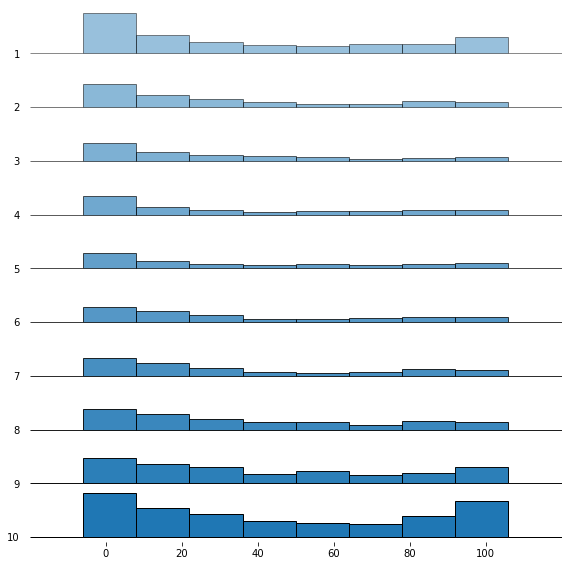

In [68]:
joyplot(df_test, by = 'percentile_group', column = 'upper_prob', figsize = (8,8), colormap = cm.autumn
        , fade = True, overlap = 0, hist = True)
plt.show()